<a href="https://colab.research.google.com/github/ulkster/MIT-Course/blob/main/ULKUCU_Learners_Notebook_Boston_house_price_Full%2BCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

### **Importing the necessary libraries & Loading Data**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# I import the Model Training libraries later so that they're closer to the relevant code

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Ignore all warnings of the type "UndefinedMetricWarning"
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

**Loading the dataset**

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT Data Science - Python Course/Elective Project/MACHINE LEARNING/Boston.csv')
# returns the first & final 5 rows
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


## Data Overview

- Observations
- Sanity checks

In [ ]:
# prompt: sanity check

# Check the size of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# Check for missing values
print(f'The dataset has {df.isnull().sum().sum()} missing values')    # the first '.sum()' counts empties in each row...
                                                                      # --> the second sums up the total empties in the data

# Check the data types of each column
print(df.dtypes)

# Check the summary statistics of the dataset
print('\n Summary Statistics')
print(df.describe())

The dataset has 506 rows and 13 columns
The dataset has 0 missing values
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

 Summary Statistics
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500 

In [ ]:
# prompt: number of unique values for each column

for col in df.columns:
  print(f"Number of unique values for column '{col}': {df[col].nunique()}")


Number of unique values for column 'CRIM': 504
Number of unique values for column 'ZN': 26
Number of unique values for column 'INDUS': 76
Number of unique values for column 'CHAS': 2
Number of unique values for column 'NOX': 81
Number of unique values for column 'RM': 446
Number of unique values for column 'AGE': 356
Number of unique values for column 'DIS': 412
Number of unique values for column 'RAD': 9
Number of unique values for column 'TAX': 66
Number of unique values for column 'PTRATIO': 46
Number of unique values for column 'LSTAT': 455
Number of unique values for column 'MEDV': 229


In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

**Observations:**

*   All columns are inputted as numerical (float & int), so it doesn't appear to be necessary to clean the data (ex: if a column that should be numerical like Number of Rooms was an object with an entry like "three")
    *   'CHAS' is a dummy variable
    *   'RAD' appears to be categorical with numbers, but the variable definition is unclear how it is assigned.

*   There are no null values or duplicates.  There could still be entries of '0' that should be dealt with (ex: if a record has 0 rooms)... with the exception of the dummy variable for a house being next to the Charles River since that's binary.

*   Crime rate ('CRIM') is almost as unique as the number of records (504 vs. 506, respectively).  At first glance, I thought this was odd since I felt like houses in the same suburb should have the same crime rate and I only found about 21-23 officially listed suburbs of Boston.  But when checking the official document from which this dataset was derived, I learned that the data is broken down into counties and towns and tracts from the surrounding Boston area.  And when approximating the amount of those geographical breakdowns based on roughly ten pieces per page and about a dozen pages each, the numbers make more sense.
    *   Plus, even if it was unique for each home record, it is an actual statistic and not an index (which we would normally drop).  So we'll keep it in the dataframe.

*   Having said that, it's interesting that each statistic seems to come from a different method of geographical measurement since they have different amounts of unique values (some have single-digit amount of uniques, some have double-digit and the rest have triple-digit)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

* No categorical variables -> no use for bar plots, violin plots, etc.

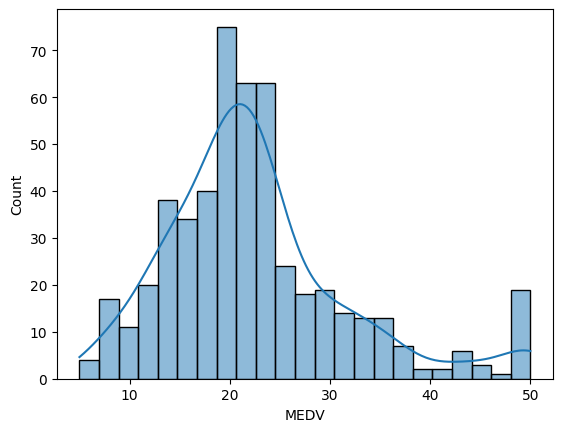

In [ ]:
# Histogram for Median values in $Thousands
# Overlay a smooth density estimation plot on the histogram
sns.histplot(df['MEDV'], kde = True)

# .show() removes the "<Axes> tag that's basically superfluous"
plt.show()


**Distribution Observations:**

*   The MEDV data has a bit of right skew, with the most frequent median values being in the 18-24'ish range.

*   There is slight hill in the upper extreme bin.  This might be worth looking into deeper to see why there are more homes at the highest value than between the rest of the 30-50 tail.

*   Since the MEDV column is in thousands, I was surprised that this data only reaches a maximum of $50,000 & Boston definitely has plenty of far more expensive areas.  But then I remembered this is from 1970 & I verified with a quick query of median home prices at that time, which gel with this data.

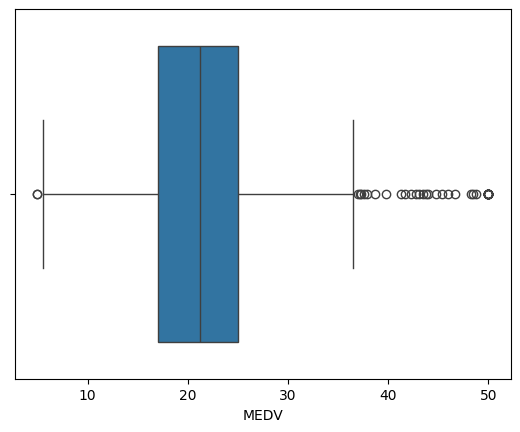

In [ ]:
# Boxplot for MEDV (along the x-axis)

sns.boxplot(x = df['MEDV'])
plt.show()

**'MEDV' Boxplot Observations**

* The boxplot shows many *outliers*, one on the low end & many more more on the *high end*.

* It is also even clearer here that without the outliers, 'MEDV' appears to be *normally distributed*.

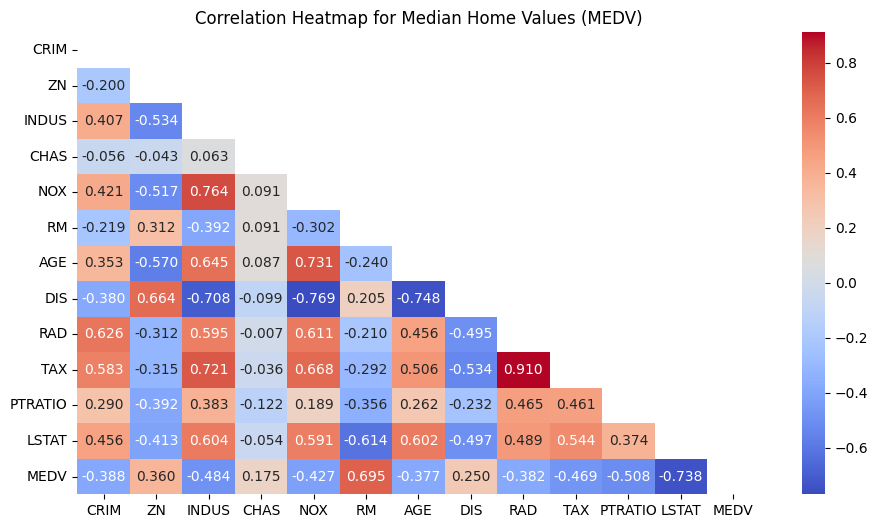

In [ ]:
# Calculate the correlation matrix
corr = df.corr()
plt.figure(figsize=(11, 6))
plt.title('Correlation Heatmap for Median Home Values (MEDV)')

### Show just LOWER Triangle since the other corner has duplicate values ###
# 1) 'corr.where' = makes a separate matrix that gives you more control (i.e. in this case, showing just one triangle)
# 2) 'np.tril' = extracts just the lower triangle (as opposed to 'np.triu' for the upper)
# 3) 'np.ones' = creates a matrix of ones (matching the shape of the 'corr' matrix).
#                Helps w/ readability to emphasize that this is a boolean mask (to just show lower triangle)
#                It could also help with efficiency since the function is highly optimized
# 4) 'k=-1' = removes the main diagonal where each variable matches with itself (1.0)
# 5) '.astype(bool)' = used in conjunction with the 'tril' boolean mask function to extract the lower triangle
lower = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))

# Create the actual heatmap with the lower triangle
# 1) the 'coolwarm' color map gives an intuitive aesthetic since this is a "heatmap" afterall
# 2) 'fmt' = sets the rounding (i.e. ".3f" -> three decimal places)
sns.heatmap(lower, cmap='coolwarm', annot=True, fmt=".3f")

plt.show()

In [ ]:
# Showing the strongly correlated pairs under 1.0 (which are just themselves matched up)

# '.unstack()' = flips the rows & columns of the matrix like '.T' (which only works with dataframes)
# 'ascending=False' = sorts in descending order (i.e. highest first)
# 'drop_duplicates()' = remove the repeat pairs (ex: RAD & TAX = TAX & RAD, so we don't need both)
strong_pairs = corr.unstack().sort_values(ascending=False).drop_duplicates()
strong_pairs = strong_pairs[strong_pairs < 1.0]         # we don't want full correlation since that just means it's the same variable
strong_pairs = strong_pairs[abs(strong_pairs) >= 0.75]  # using the accepted 0.75 threshhold for "strong" correlation

print(strong_pairs)


RAD  TAX      0.910228
NOX  INDUS    0.763651
     DIS     -0.769230
dtype: float64


**Correlation Observations (pt. 1 - Initial Impressions)**

*   Tax ('TAX') and Radial Highway Accessibility ('RAD') are highly correlated, almost 1.0 (0.91). This might be cause for dropping one of those columns in further analysis to avoid skew if they don't both add new information.

*   Using the accepted threshhold of 0.75 as "strong" correlation, only the Nitric Oxide concentration ('NOX') meets that criteria (other than the aforementioned pair):
    * a strong *positive* correlation with Industrial Area ('INDUS') = 0.76 (likely due to the air pollution from that type of non-residential area that likely has factories and/or big trucks coming and going).  **note:** I am also assuming an inclusion of Nitrogen Dioxide (since, coincidentally or not, Nitric Oxide & Nitrogen Dioxide together make up the pollutant with chemical symbol of NOx).
    * a strong *negative* correlation with Distance to Employment Centers ('DIS') = -0.77 (makes sense: you wouldn't want people coming to apply for work and interview in more polluted areas)

**Correlation Observations (pt. 1a - Dependent Var's)**

*   From looking at the data, I'd say that the Tax rate should certainly be *dependent* on home value ('MEDV'), which itself is likely dependent on other factors (ex: a house with more rooms generally is worth more, as is the case here since MEDV's *strongest positive* correlation is indeed with RM = 0.70).
    *   However, the correlation between 'TAX' & 'MEDV' is not only weak, but it's also negative (-0.47).  This is quite surprising since I'd expect the tax rate to increase as the value increases, not the other way around.
    *   In fact, the strongest correlations that the *assumedly dependent* Tax rate have are with Industrial setting ('INDUS' @ 0.72) & Nitric Oxide level ('NOX').  This surprises me since I would think those would be lower-taxed areas since they're not attractive to housing.  And my understanding is that businesses generally pay lower taxes than individuals... but perhaps they pay more in property tax (as opposed to income tax, for example) for their larger properties that take up space which could have been used for more houses paying a lower property tax rate each (ex: ten houses paying $5k vs. one warehouse paying $50k).

*   Continuing with 'NOX' (since I kind of see it *dependent* on the surrounding area), its *second strongest positive correlation* (after 'INDUS', mentioned above) is with 'AGE' (0.73), which almost qualifies as "strong."  This is logical since older homes might

*   On the other hand, MEDV's *strongest overall correlation* is with the percentage of low-income residents ('LSTAT'), which is -0.74 (also just on the cusp of the accepted "strong" correlation).  This makes sense that if more people are in a lower economic status, their houses likely have lower values.
    *   Nothing else really has a significant correlation with home value.

*   There are other relations that *could* be dependent (ex: being next to the river may affect how close a house is to an employment center, or more residents living in a lower economic status could yield a higher crime rate), but those are more *correlative* as opposed to direct dependence.

In [ ]:
# Loosening the 0.75 restriction a bit to see "relatively strong" correlations
# Redefining the same 'strong_pairs' variable so it's self-contained within each code cell & can be reused (instead of coming up with new names for each cell)

strong_pairs = corr.unstack().sort_values(ascending=False).drop_duplicates()
strong_pairs = strong_pairs[(abs(strong_pairs) >= 0.60) & (abs(strong_pairs) < 0.75)]

print(strong_pairs)

AGE    NOX      0.731470
TAX    INDUS    0.720760
MEDV   RM       0.695360
TAX    NOX      0.668023
ZN     DIS      0.664408
AGE    INDUS    0.644779
RAD    CRIM     0.625505
       NOX      0.611441
LSTAT  INDUS    0.603800
       AGE      0.602339
RM     LSTAT   -0.613808
INDUS  DIS     -0.708027
LSTAT  MEDV    -0.737663
AGE    DIS     -0.747881
dtype: float64


**Correlation Observations (pt. 2 - Relatively Strong Correlations)**

*   While these might not meet the 0.75 accepted "strong" threshhold, there are some that are close that may be worth noting for further analysis, such as:
    * *positive*: {AGE & NOX}, {TAX & INDUS}
    * *negative*: {INDUS & DIS}, {LSTAT & MEDV}, {AGE & DIS}

**Correlation Observations (pt. 3 - Specifically 'MEDV' = target/dependent variable)**

* All that being said, to summarize our focus on the target variable (housing price), the two strongest correlations are:
  * Number of rooms ('RM') = 0.695
  * Percentage or lower status population ('LSTAT') = -0.738

**UNIVARIATE ANALYSIS**

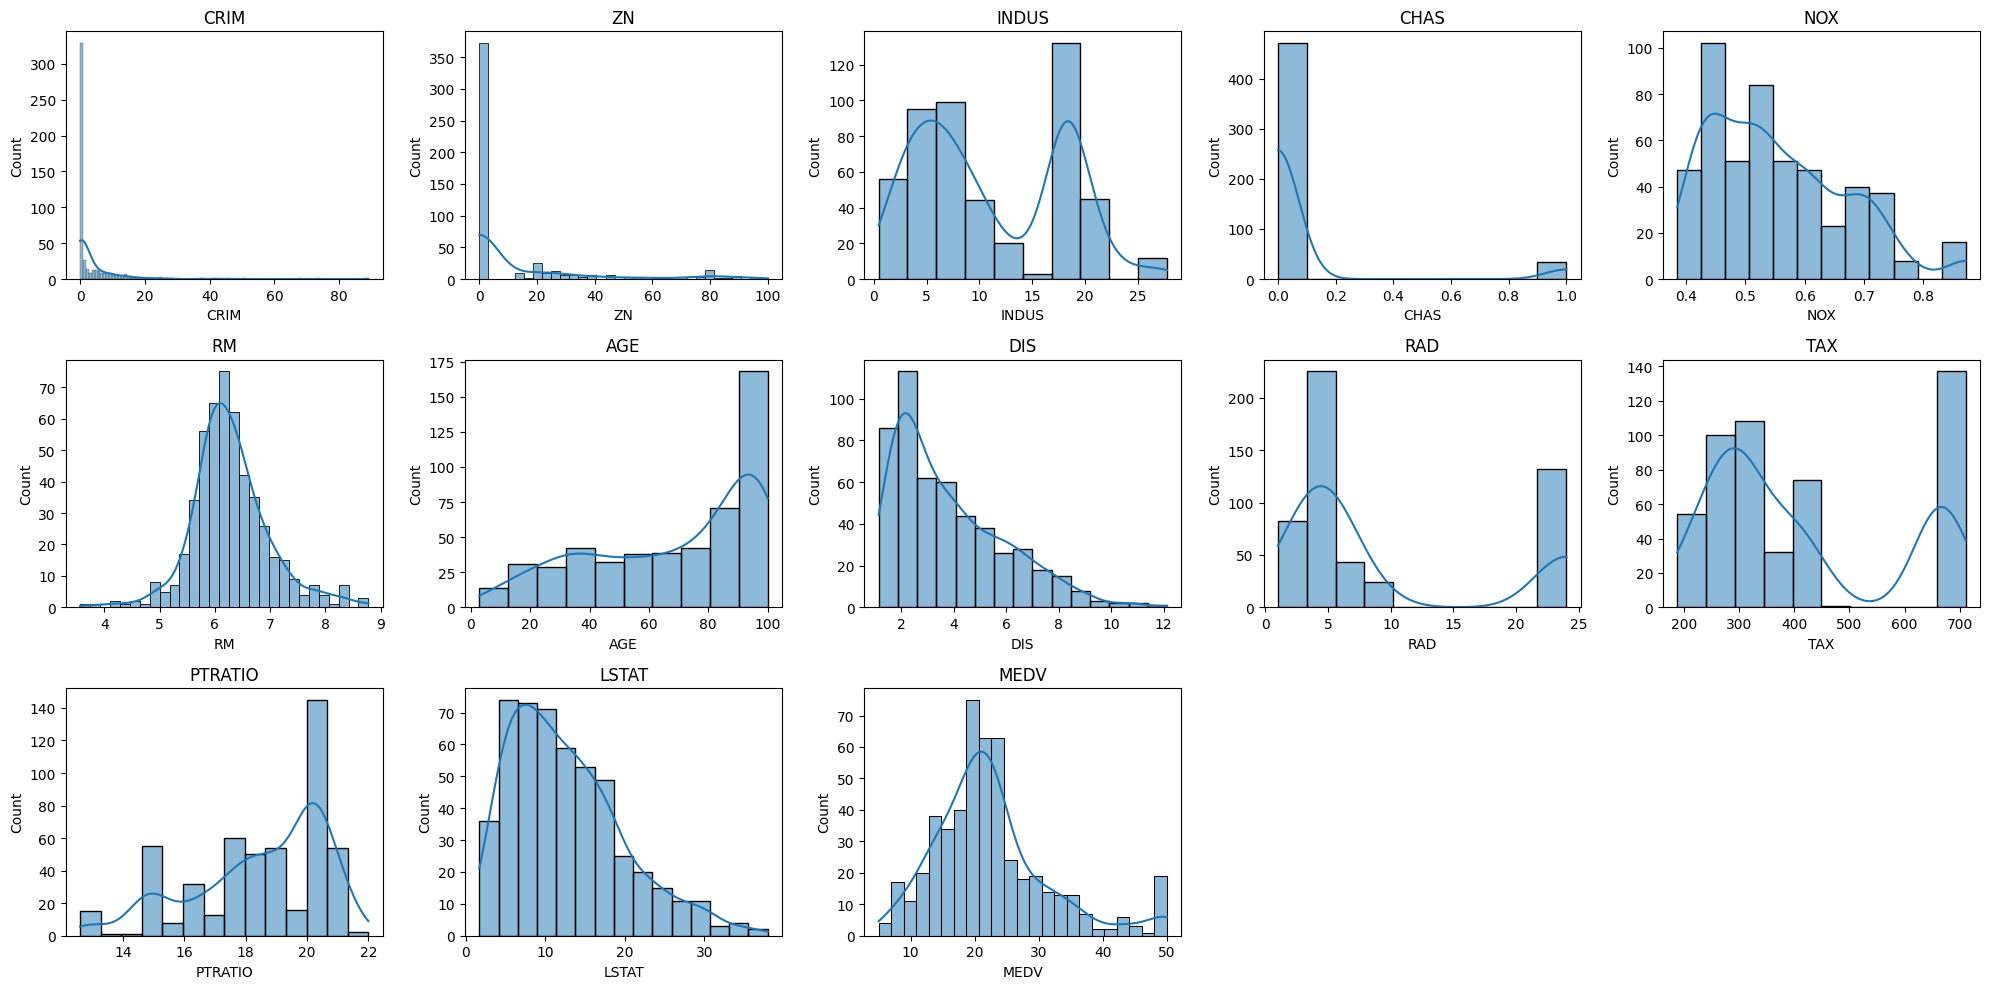

In [ ]:
# Create the axes object with the correct number of rows and columns:

# With thirteen variables, setting five columns will fit three rows of charts (5x3 = 15, which fits 13)
num_cols = 5  # this also strikes a nice balance between screen real estate efficiency & readability

# Defining a separate 'adjustment' variable to clarify its use...
# -> which is to make sure enough rows get used to fit all the plots since...
# -> there will likely often be an amount of variables that don't necessarily...
# -> fit into an easily configured grid of plots.
adjustment = num_cols - 1   # Subtracting 1 from the num_cols allows the 'adjustment' to ensure at least one empty column at the end of each row

# The 'adjustment' variable is added to the amount of variables so that it yields enough rows...
# -> after the integer division of "// num_cols", which will truncate the quotient.
# -> So we want to make sure it there's enough space for all the plots.
num_rows = (len(df.columns) + adjustment) // num_cols  # Adjust this value based on the number of columns (which are all numeric for this data)

axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))[1]    # the [1] extracts the second element (axes object) from the tuple

# Loop throw the variables and plot each.
for i, col in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=col, kde=True, ax=ax)   # although maybe not technically necessary in this case of straight-forward data...
                                                    # -> setting 'x=col' helps with efficiency so that the function does not need...
                                                    # -> to try and infer what should be on the x-axis.
    ax.set_title(col)   # even though the x-axis already has the variable, a title is larger and helps reading the output more clearly

# Hide the empty axes since we included the adjustment which adds empty columns at the end of each row.
for i in range(len(df.columns), num_rows * num_cols):
    axes[i // num_cols, i % num_cols].set_visible(False)

# Display the plot
plt.tight_layout()  # automatically adjusts the spacing since we have multiple plots in a confined space
plt.show()

**UNIVARIATE Analyses (pt. 1 - Results)**

1.    *Left Skew*
      * **AGE** - Tallest @ 90-100
      * **PTRATIO** - Tallest @ 20

2.    *Normal*
      * **RM** - Centered around 6.2

3.    *Right Skew*
      * **CRIM & ZN** - Heavily right-skewed with almost all results in the first bin & the remaining few values spread across the right tail
      * **CHAS** - Nearly all 0's (not river-bound) & some 1's (tract is bound to the river)
      * **NOX** - Also somewhat bimodal @ ~0.44 & 0.51
      * **DIS** - Max height @ 2
      * **LSTAT** - Hill @ 5-10
      * **MEDV** - Almost normal but with a blip in the 50 column

4.    *`Bimodal`*
      * **INDUS** - Modes around 3-8 & 17-20
      * **RAD** - Tallest columns around 3-5 & 22-24
      * **TAX** - Tallest around 240-350 & 650-700

**UNIVARIATE Analyses (pt. 2 - Interpretation)**

1.  Most **crime rate** is almost 0 per capita.  This could be interpreted as neighborhoods being mostly safe.

2.  Most homes are *not* **zoned for over 25k sq ft**.  Residential, makes sense.  A quicheck online shows that US avg plot size = 18k sq ft.

3.  Proportion of **industrial acres** is mostly either around 4-9% or about 18%.

4.  Vast majority of houses are not on tracts that **bound the river**.

5.  **Nitric oxide concentration** is mostly under 0.6 parts per 10 million, which equates to 60 parts per billion (when researching this chemical measurement, it’s usually reported as parts per billion, hence this quick conversion).

6.  Most homes have just over six **rooms on average**.  If we imagine a typical home having a kitchen & living room to begin with, that leaves about four-five rooms for bedrooms & bathrooms (2-3 for each).  Makes sense.

7.  The **AGE** variable is a proportion of homes over 30 years old (i.e. built before 1940), and not an actual age of the home as one might assume from the variable name.  In this data, since the plot does not seem to show any values at 0, we can conclude that none of the areas surveyed (town, county, tract, etc.) are new developments.  For example, when I lived in Plano, Texas in the 90’s, there were many developments that just started and new homes were being built around the same time.  In fact for this 1970 Boston data, the largest proportion of records reflect areas over 30 years old (the tallest bin is 90-100%).  Since Boston was one of the earliest settled colonies in America and a very historical area, it makes sense that so many homes are more than three decades old.

8.  Assuming the **DIS** variable (which measures distance to employment center) is measured in miles, nearly every record is within 10 miles (with most within 3 miles).  That seems logical to live in a home near places to get a job.  This data would likely be quite different in more recent times with more people owning cars, mass transit being more advanced, and remote/online work being possible with the internet.

9.  The **highway accessibility** is also usually quite low.  I would imagine this could be due to fewer highways being built back then (with similar reasoning to the previous variable, i.e. fewer cars → less need for radial highway accessibility).

10. This highest single proportion of **tax rate per \$10k** is around \$650 - \$700 (assuming that variable is in dollars).  The rest of the data is between \$200 - \$450.  This would equate to about 7% and 2-4.5%, respectively.  By contrast, the average tax rate for Boston in 2021 was only \$107 per \$10k.  The lower rate could relate to home values rising so much since 1970 (currently around \$800k compared to the dataset which shows median home values being around $20k), so the city can advertise lower percentage taxes while bringing in far more actual dollars because of the steep price increases.

11. There are several **pupil-teacher ratios** with just over 50 counts each, and the most frequent is just over 20 pupils per teacher (nearly 150 records).

12. The data also shows the lion’s share of homes are in areas with less than 20% **lower population status**.  Most commonly, they had about 5-10% lower status.

13. Finally, our target variable - **median home value** - mostly centered around $20k.  While one might initially think of a house being valued in the \$100,000’s in recent decades, the data makes more sense when contextualizing the 1970 collection date.

**BIVARIATE ANALYSES (correlations at least +- 0.70)**

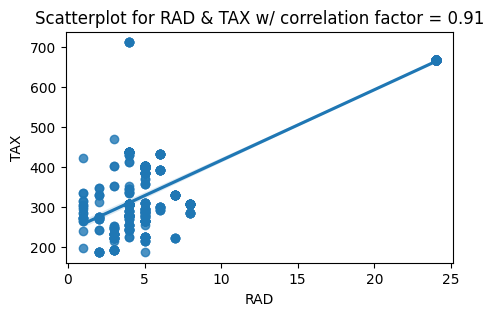

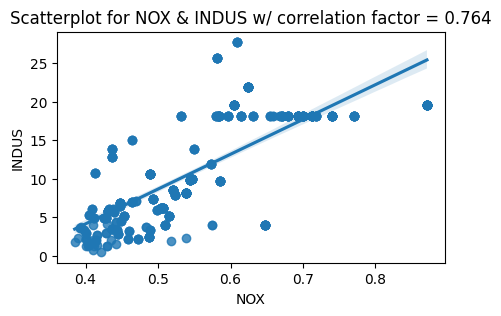

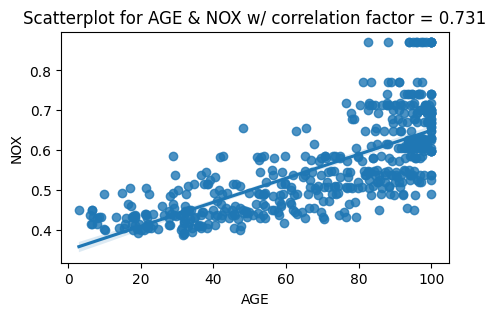

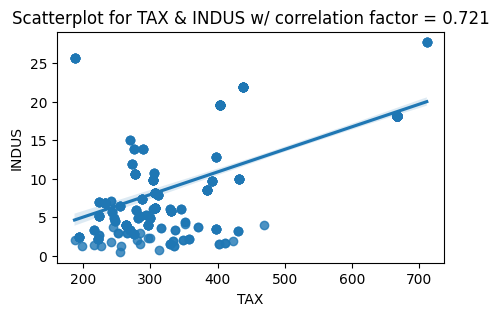

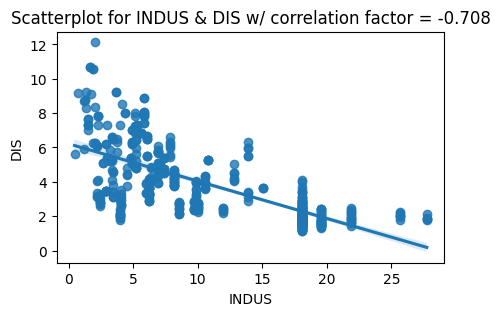

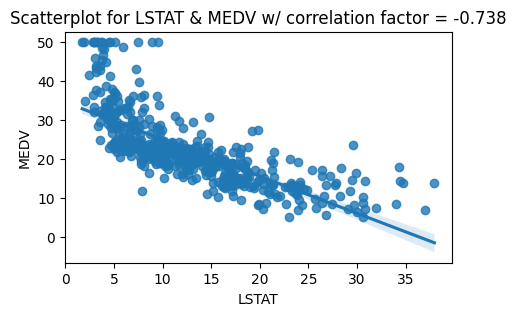

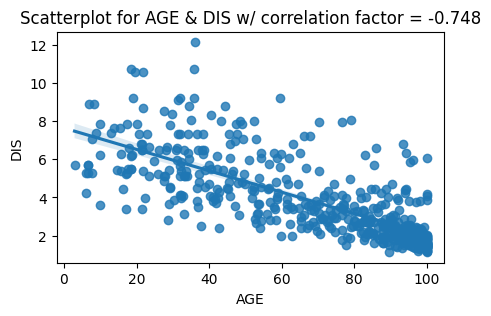

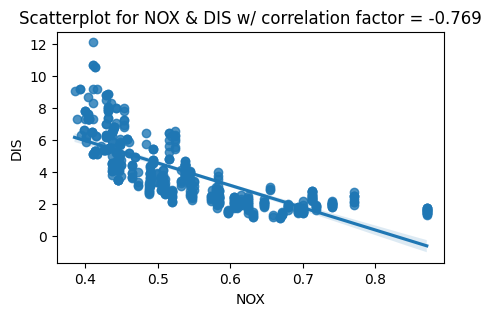

In [ ]:
# Get the pairs with strong correlations
strong_pairs = corr.unstack().sort_values(ascending=False).drop_duplicates()
strong_pairs = strong_pairs[(abs(strong_pairs) >= 0.70) & (abs(strong_pairs) < 1.0)]

# Loop through the pairs and plot the bivariate analysis
for col1, col2 in strong_pairs.index:
    plt.figure(figsize=(5, 3))
    plt.title(f'Scatterplot for {col1} & {col2} w/ correlation factor = {round(df[col1].corr(df[col2]), 3)}')
    sns.regplot(x=df[col1], y=df[col2])   # '.regplot' fits a line of best fit onto a scatterplot (hence, "regression")
    plt.show()

**BIVARIATE Observations**

* Even though highway accessibility (‘RAD’) and tax rate (‘TAX’) have the strongest correlation (almost a perfect 1.0), the plot shows that most of the data (except for two outliers) is clustered at the front with no obvious direction (before considering the regression line).  In fact, the value at the end seems to contribute to the regression line having a positive slope.  We’ll see the model trainings if they cause noise.

* Although the remaining correlations are pretty close, the negatives look more visually obvious.  Ex: INDUS & DIS have a smaller correlation than TAX & INDUS (-0.708 vs. 0.721), but the former scatterplot visually looks more correlated.

  * Furthermore, LSTAT & MEDV looks to have a tighter correlation (aside from some points at the top near the beginning), than NOX & INDUS (-0.738 vs. 0.764).


## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Summary stats for MEDV to compare the model performance metrics
df['MEDV'].describe()     # performed on original 'df' before any transformations

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

**Stats Observations & Plan Forward**

1.  We already know from the top that there are *no missing values* (makes sense since this is official, governmental data).

2.  There is a bit of a right skew to the housing prices (which is common with real estate data), so we'll perform a log transformation on 'MEDV'.  Also, the summary stats show that the *standard deviation* is nearly **half** the *mean*, so that also helps to decide that a log transformation might be a good idea.

3.  Since all variables are numerical & useful (no categoricals or IDs), we do not need anything like dummy variables, tSNE, PCA, drop irrelevant columns, etc.

In [ ]:
# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Import libraries for building linear regression model
#from statsmodels.formula.api import ols
#import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression

In [ ]:
# Copying data to another variable to avoid any changes to original data
data = df.copy()

### Log Transformation

In [ ]:
# Apply the log transformation to the target variable MEDV since there is a bit of skew
data['MEDV'] = np.log(df['MEDV'])   # make sure only to take log of 'df' so it doesn't keep logging itself

# View the transformed dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,3.589059


**Compare boxplots for MEDV in original 'df' & copied 'data' (after log transform)**

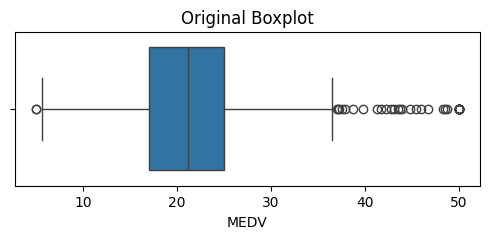

In [ ]:
# Original MEDV boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x = df['MEDV'])

plt.title('Original Boxplot')
plt.show()

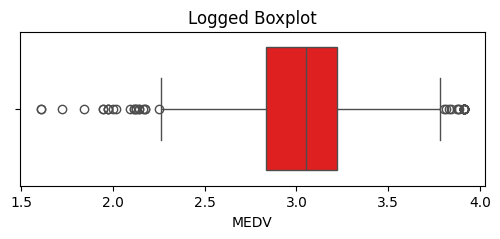

In [ ]:
# Logged MEDV boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x = data['MEDV'], color='red')    # making red to distinguish

plt.title('Logged Boxplot')
plt.show()

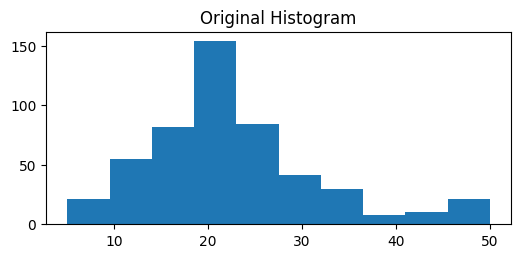

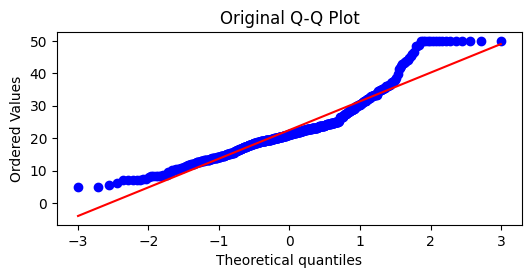

In [ ]:
# Create a histogram of the original variable (with the untouched 'df' dataframe)
plt.figure(figsize=(6, 2.5))
plt.hist(df['MEDV'])
plt.title('Original Histogram')
plt.show()

# Create a Q-Q plot of the original variable
import scipy.stats as stats
plt.figure(figsize=(6, 2.5))
stats.probplot(df['MEDV'], dist="norm", plot=plt)

plt.title('Original Q-Q Plot')
plt.show()

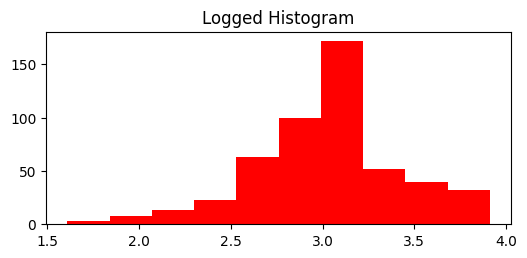

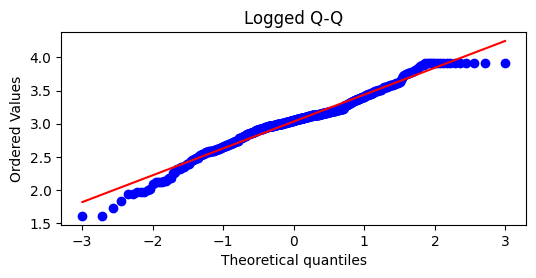

In [ ]:
# Create a histogram of the log-transformed variable
plt.figure(figsize=(6, 2.5))
plt.title('Logged Histogram')
plt.hist(data['MEDV'], color='red')    # making red to distinguish
plt.show()

# Create a Q-Q plot of the log-transformed variable
import scipy.stats as stats
plt.figure(figsize=(6, 2.5))
stats.probplot(data['MEDV'], dist="norm", plot=plt)

plt.title('Logged Q-Q')
plt.show()

In [ ]:
# Summary stats for MEDV to compare the model performance metrics
print('Logged MEDV stats')
data['MEDV'].describe()

Logged MEDV stats


count    506.000000
mean       3.034513
std        0.408757
min        1.609438
25%        2.834680
50%        3.054001
75%        3.218876
max        3.912023
Name: MEDV, dtype: float64

In [ ]:
# Displaying again the original stats for comparison after the log
print('Orig MEDV stats')
df['MEDV'].describe()

Orig MEDV stats


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

**Post-Log Observations**

* As previously mentioned, there wasn't much of a skew in the original 'MEDV' data, so the log transformation didn't have a huge affect.  However, it did help a bit to bring values closer to a normal distribution (as seen in both plots above)

* Plus, the *logged standard deviation* is **much smaller** in relation to the newly logged mean (0.4 / 3.0 approx = **13%** as opposed to the original STD approx = 40% of mean).  This indicates that there is far less variance, which should certainly be the case after logging.

* I also tried some scaling techniques to see any improvement & address outliers, but they didn't seem to help.  So I left them out so as not to further manipulate the data and complexify the interpretation (right now, it's just one step, which should be easy to reverse after model training)

### Splitting Data

In [ ]:
# Separating target MEDV from the features
x = data.drop(['MEDV'], axis = 1)   # 'axis=1' means to drop a column (as opposed to 'axis=0' for a row)
y = data['MEDV']

In [ ]:
# Split data into train and test sets in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(
      x, y,
      test_size = 0.20,
      shuffle = True,            # reorders the list when taking random samples
      random_state = 1    # sets a seed to reproduce results while comparing different model runs
    )

* From here on out, we'll be creating a new x_train & x_test for each model (ex: x_train1, etc.) but keeping the same y_train & y_test.

* This is because we're trying to see which model performs the best on the same target variable

## Model Building - Linear Regression

* Define an Adjusted R-squared function to use different metrics functions (ex: RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression models evaluation.

* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average of absolute percentage error for all data points. The absolute percentage error is defined as predicted value minus actual values divided by actual values. It should be OK sine we have no extremes or zeroes in the housing prices.

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)   # measures variance in MEDV
    n = predictors.shape[0]     # number of observations in the dataset (= rows here, since no missing values)
    k = predictors.shape[1]     # number of independent variables in the model
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))   # standard formula for calculating adjusted R-squared


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different performance metrics to check regression model
def model_performance_regression(model, predictors, target):
    '''
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    '''

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

## Model Performance Check

1. How does the model perform? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model perform after cross validation?

### **Performance Checks (pt. 1 - OLS)**

In [ ]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
# The constant avoids the model from forcing an intercept @ the origin
x_train1 = sm.add_constant(x_train)

# Add constant to test data
x_test1 = sm.add_constant(x_test)

# Train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     117.8
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.02e-121
Time:                        07:54:11   Log-Likelihood:                 101.65
No. Observations:                 404   AIC:                            -177.3
Df Residuals:                     391   BIC:                            -125.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4875      0.222     20.194      0.0

**Model Summary Stats Observations**

* The *const* is not a focal point at this stage yet having all independent variables at zero would not make much sense (ex: if there were no rooms 'RM', then there's no house).

* Using the threshhold of p < 0.05 --> statistically significant, we see that all variables **except** *INDUS & AGE* meet that criteria.  So we'll drop those two columns in the next round of model tuning.

* NOX has the highest standard error (0.171 - the only one above 0.04), but it still has p-value of 0.00, so it's definitely significant right now.

In [ ]:
# Show streamlined model performance results

lin_reg_train = model_performance_regression(olsmodel1, x_train1, y_train)
lin_reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.188143,0.135757,0.783387,0.776166,4.720875


In [ ]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.201199,0.151518,0.774987,0.741746,5.303621


**Observations (pt. 1 - Initial Impressions )**

* The training & test data results are pretty similar in general

* RMSE, MAE, MAPE are all *slightly higher* in the test data
  * R-sq & Adj R-sq are expectedly *slightly lower* in the test data
  * This suggests there might be some *slight* overfitting (again, especially since this is based on logged data)

* We'll keep tuning the model to see if we can **minimize** RMSE, MAE & MAPE along with **maximizing** R-sq & Adj R-sq

**Observations (pt. 1a - Delve a little deeper)**

* Both *R-sq* are pretty close to 1 already, so a lot of the variance is already explained (just over 2/3).
  * Similar story for *Adj R-sq*, except just slightly lower than non-adjusted
  * Goal is to maximize -> 1.0 to account for as much variance as possible

* RMSE & MAE (especially) are quite low, which is good.  But we need to just remember that this is on logged data (not the original, which would have a higher value).  We're trying to get this as close to 0 as possible since they are proportions.

* MAPE, normally as a percent on untransformed data, would be pretty good at around 5.  But it does not necessarily guarantee ~5% error on the logged data.  While still low (good), we will need to convert data back to original form before making conclusions (after tuning models to acceptable performance results).

### **Multicollinearity Check #1**

* Includes definition of a new function for checking VIF (will be called multiple times)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(x_train1))

    feature         VIF
0     const  545.469224
1      CRIM    1.725903
2        ZN    2.515170
3     INDUS    3.812858
4      CHAS    1.072320
5       NOX    4.421201
6        RM    1.925194
7       AGE    3.225755
8       DIS    4.205930
9       RAD    8.076667
10      TAX    9.807470
11  PTRATIO    1.859054
12    LSTAT    2.988056


**First Glance**

* With the goal of bringing VIF's below 5, *'RAD' & 'TAX'* are likely culprits for collinearity.  This aligns with our previous observation in the heatmap that showed a strong correlation (~0.910).

* They should ***not*** both just get dropped because of their high VIF's since they also both have **very low p-values** (0.00 & 0.002), which means they're definitely still statistically significant.

* One possible interpretation might be that the government charges higher tax rate for homes closer to highways.  But this is not a certainty, and there is no obvious relationship from what I can tell and could both be valuable factors on home value (and as a result, if a potential buyer would be interested in that home).  Thus, more consideration is needed.

  * Since I have no more knowledge of 1970 Boston housing data other than "educated" guesses, I'm wary of partial inclusion or creating a composite variable or other transformations.

  * As a result, I'll try Regularization and then see if Cross-Validation is necessary

### **Performance Checks (pt. 2 - Drop 'INDUS' (p-val > 0.05))**

In [ ]:
# Drop INDUS since it's not statistically significant
x_train2 = x_train1.drop('INDUS', axis = 1)
x_test2 = x_test1.drop('INDUS', axis = 1)

# Train the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Get the model summary
olsmodel2.summary()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     128.7
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.13e-122
Time:                        07:54:11   Log-Likelihood:                 101.39
No. Observations:                 404   AIC:                            -178.8
Df Residuals:                     392   BIC:                            -130.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4733      0.221     20.223      0.0

In [ ]:
# Show streamlined model performance results
lin_reg_train = model_performance_regression(olsmodel2, x_train2, y_train)
lin_reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.188267,0.136141,0.783102,0.776445,4.735325


In [ ]:
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.201392,0.151367,0.774555,0.744158,5.300697


**Multicollinearity Check #2**

In [ ]:
# Now that the function is written, it just needs to be called with the new training data each iteration
print(checking_vif(x_train2))

    feature         VIF
0     const  541.132722
1      CRIM    1.724862
2        ZN    2.474003
3      CHAS    1.065395
4       NOX    4.061343
5        RM    1.915810
6       AGE    3.223742
7       DIS    4.084230
8       RAD    7.455528
9       TAX    8.097944
10  PTRATIO    1.824926
11    LSTAT    2.963596


**First Glance**

* With the goal of bringing VIF's below 5, *'RAD' & 'TAX'* are likely culprits for collinearity.  This aligns with our previous observation in the heatmap that showed a strong correlation (~0.910).

* They should ***not*** both just get dropped because of their high VIF's since they also both have **very low p-values** (0.00 & 0.002), which means they're definitely still statistically significant.

* One possible interpretation might be that the government charges higher tax rate for homes closer to highways.  But this is not a certainty, and there is no obvious relationship from what I can tell and could both be valuable factors on home value (and as a result, if a potential buyer would be interested in that home).  Thus, more consideration is needed.

  * Since I have no more knowledge of 1970 Boston housing data other than "educated" guesses, I'm wary of partial inclusion or creating a composite variable or other transformations.

  * As a result, I'll try Regularization after dropping 'AGE' (the other large p-value) and then see if Cross-Validation is necessary

**Post-'INDUS' Drop**

* The regression test metrics were nearly identical (miniscule changes well below even a percent)

* The VIF scores, however, did see significant improvements for the two variables which showed potential multicollinearity (*'RAD' & 'TAX'*)
  * 'RAD' dropped about 8% (from 8.1 -> 7.5)
  * 'TAX' dropped about 18% (from 9.8 -> 8.1)
  * Both are still over 5.0, but they certainly got closer (which is encouraging)

### **Performance Checks (pt. 3 - Drop 'AGE' (p-val > 0.05))**

In [ ]:
# Drop INDUS since it's not statistically significant
x_train3 = x_train2.drop('AGE', axis = 1)
x_test3 = x_test2.drop('AGE', axis = 1)

# Train the model
olsmodel3 = sm.OLS(y_train, x_train3).fit()

# Get the model summary
olsmodel3.summary()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     141.6
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.29e-123
Time:                        07:54:11   Log-Likelihood:                 101.05
No. Observations:                 404   AIC:                            -180.1
Df Residuals:                     393   BIC:                            -136.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4621      0.221     20.220      0.0

*Both insignificant values dropped (no more that have p-val > 0.05)*

In [ ]:
# Show streamlined model performance results
lin_reg_train = model_performance_regression(olsmodel3, x_train3, y_train)
print('Training')
lin_reg_train

Training


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.188425,0.136118,0.782737,0.776641,4.732765


In [ ]:
lin_reg_test = model_performance_regression(olsmodel3, x_test3, y_test)
print('Test')
lin_reg_test

Test


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.201182,0.150749,0.775025,0.747528,5.282247


**Multicollinearity Check #3**

In [ ]:
# Now that the function is written, it just needs to be called with the new training data each iteration
print(checking_vif(x_train3))

    feature         VIF
0     const  539.046521
1      CRIM    1.724428
2        ZN    2.454291
3      CHAS    1.063446
4       NOX    3.817146
5        RM    1.837575
6       DIS    3.656076
7       RAD    7.414623
8       TAX    8.094189
9   PTRATIO    1.811378
10    LSTAT    2.533244


**Post-'AGE' Drop**

* This time, there's hardly any change --> Time to address the *multicollinearity of 'RAD' & 'TAX'*

### Regularization & Cross-validation to Address Multicollinearity

### **Reasons We'll Start with L1 / Lasso**

* Observations (400 & 100 for training & test data) is *not* less than number of features (12 to start with, before removing two statistically insignificant ones)

* With housing price prediction, being able to understand & interpret the model is important (ex: realtors deciding which markets to look for, homebuyers choosing a house confidently).

* Although I'm not sure, 'RAD' & 'TAX' may be providing overlapping info with one being able to "speak" for both of them.

* We're going to compare to L2 / Ridge aftewards anyway.

In [ ]:
# Run Lasso on most recent data (3rd round)
lasso_model = Lasso()
lasso_model.fit(x_train3, y_train)

Lasso()

In [ ]:
# Running it on training data w/ default alpha=1
lasso_reg = model_performance_regression(lasso_model, x_train3, y_train)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.282912,0.211084,0.510209,0.496465,7.278371


In [ ]:
# On test data
lasso_reg = model_performance_regression(lasso_model, x_test3, y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.296883,0.214129,0.510075,0.450196,7.200972


**Observations - First Lasso Run**

* With default alpha, everything got worse (higher errors & lower R-sq).

* We'll tune it to find optimised alpha and check performance metrics

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train3, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha' that I can just plug in to the Ridge() instead of manually entering it (more flexible)
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.001

* Optimal alpha was the smallest possible value we passed in

In [ ]:
# First fit only to Training Data
lasso_model_tuned = Lasso(alpha = best_alpha) # creating Tuned Ridge Regression model using optimised alpha value
lasso_model_tuned.fit(x_train3, y_train) # Fitting the data into the tuned model

Lasso(alpha=0.001)

In [ ]:
# Check performance on training data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, x_train3, y_train) #getting performance metrics on training data
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.189284,0.135492,0.780754,0.774601,4.716745


In [ ]:
# Performance check on test data
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, x_test3, y_test) #getting performance metrics on test data
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.200113,0.149175,0.777409,0.750204,5.220737


**Post-Optimised Alpha**

* While certainly better than the default alpha, the results are actually similar to what we started from the beginning of the training/test split.

* Trying even smaller alphas (ex: 0.0001) didn't change the performance metrics

### **L2 / Ridge Regression**

* Start with default alpha and tune as necessary

In [ ]:
# Run Ridge on most recent data (3rd round)
ridge_model = Ridge()
ridge_model.fit(x_train3, y_train)

Ridge()

In [ ]:
# Running it on training data w/ default alpha=1
ridge_reg = model_performance_regression(ridge_model, x_train3, y_train)
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.189588,0.135298,0.780047,0.773875,4.712732


In [ ]:
# On test data
ridge_reg = model_performance_regression(ridge_model, x_test3, y_test)
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.199281,0.148263,0.779256,0.752276,5.191889


**Post-Default Ridge**

* All results are pretty similar

* On to using optimized alpha

* Incorporate KFold within regularization

In [ ]:
# Implementing KFold with 10 subsets of the most recent training data
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}    # trying different alpha values

model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train3, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha' that I can just plug in to the Ridge() instead of manually entering it (more flexible)
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_alpha = best_params['alpha']
best_alpha

0.01

* Pretty small alpha, which means we only need a small amount of shrinkage to address the multicollinearity

In [ ]:
# First fit only to Training Data
ridge_model_tuned = Ridge(alpha = best_alpha) # creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(x_train3, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.01)

In [ ]:
# Check performance on training data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, x_train3, y_train) #getting performance metrics on training data
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.188426,0.136095,0.782736,0.77664,4.73213


In [ ]:
# Performance check on test data
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, x_test3, y_test) #getting performance metrics on test data
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.201131,0.150677,0.775139,0.747656,5.279776


**Post-Optimised Alpha**

* Hardly any change in values.  This is expected since there was hardly any overfitting, and the optimal alpha is so small.

### **Elastic Net Regression**

* Start with default alpha and tune as necessary

In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train3, y_train)

ElasticNet()

In [ ]:
elasticnet_reg = model_performance_regression(elasticnet_model, x_test3, y_test)
elasticnet_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.26178,0.195979,0.619082,0.572525,6.582915


**Observations from Default**

* Similar to *default Lasso*, the initial results are worse than our first round of training

* So will optimize alpha & L1-ratio and see what happens

In [ ]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train3, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [ ]:
# Working towards a variable 'best_alpha' that I can just plug in to the Ridge() instead of manually entering it (more flexible)
best_params = model_cv.best_params_ #getting optimised parameters for alpha
best_params

{'alpha': 0.001, 'l1_ratio': 0.001}

* Similar to Lasso, the smallest alpha was chosen as optimal.

* But with Elastic Net, we also have an optimised L1-ratio, which happens to be the smallest, as well.

In [ ]:
best_alpha = best_params['alpha']
best_ratio = best_params['l1_ratio']

In [ ]:
elasticnet_model_tuned = ElasticNet(alpha = best_alpha, l1_ratio = best_ratio)
elasticnet_model_tuned.fit(x_train3, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [ ]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, x_test3, y_test)
elasticnet_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.199873,0.149248,0.777943,0.750802,5.228518


* Definite improvement over default values, but not much better than first OLS training

* Makes sense since it combines aspects of Lasso & Ridge

### **Compare All Models**

In [ ]:
models= pd.concat([lin_reg_test,
                   ridge_reg, ridge_reg_tuned,
                   lasso_reg, lasso_reg_tuned,
                   elasticnet_reg, elasticnet_reg_tuned],
                  axis=0
                  ) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

,Models,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,Least Squares,0.201182,0.150749,0.775025,0.747528,5.282247
0,Ridge Regression,0.199281,0.148263,0.779256,0.752276,5.191889
0,Ridge Regression Tuned,0.201131,0.150677,0.775139,0.747656,5.279776
0,Lasso Regression,0.296883,0.214129,0.510075,0.450196,7.200972
0,Lasso Regression Tuned,0.200113,0.149175,0.777409,0.750204,5.220737
0,Elastic Net Regression,0.261780,0.195979,0.619082,0.572525,6.582915
0,Elastic Net Regression Tuned,0.199873,0.149248,0.777943,0.750802,5.228518


**POST-Regularization Observations:**

* Looking at the results together, the *untuned* **Ridge Regression** yields the **best** results as compared to other models, but the improvement is minute.

* These regularization techniques does not offer *much* improvement to the performance metrics.

* So, we could apply some **Non Linear models** later to check if the model performance improves or not.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**ASSUMPTIONS to Check:**

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No Heteroscedasticity

### **1. Mean of residuals should be 0**

In [ ]:
# Using untuned Ridge model since that yielded best performance metrics
# Also the same x_train3 since that had the insignificant variables removed (plus the constant)
y_pred_log = ridge_model.predict(x_train3)

In [ ]:
y_train_predicted = ridge_model.predict(x_train3)
y_test_predicted = ridge_model.predict(x_test3)

In [ ]:
y_pred = np.exp(y_pred_log)
y_actual = df['MEDV']

In [ ]:
# Residuals
residuals_train = y_train - y_train_predicted
residuals_test = y_test - y_test_predicted

In [ ]:
residuals_train.mean()

5.485161280078744e-16

* Training residuals are *very* small, essentially zero

In [ ]:
residuals_test.mean()

-0.022774700226657257

* Test data residuals are quite a bit larger in magnitude compared to the training data, but it's still pretty small & close to zero.

* **Assumption #1: check!**

### **2. Normality of error terms**

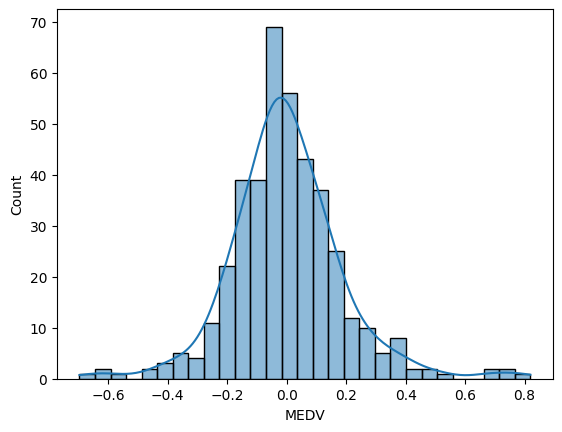

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals_train, kde=True);

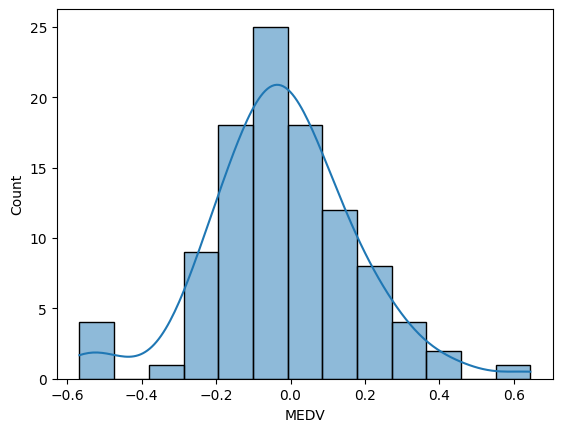

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals_test, kde=True);

*Both Training & Test Residuals are Normal!*

### **3. Linearity of variables**

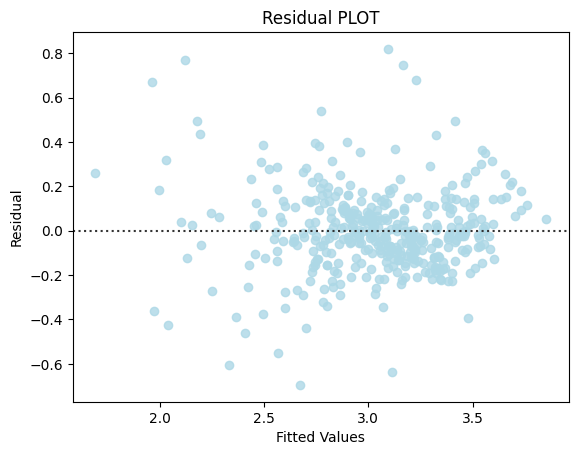

In [ ]:
# Predicted values
fitted = ridge_model.predict(x_train3)

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residuals_train, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

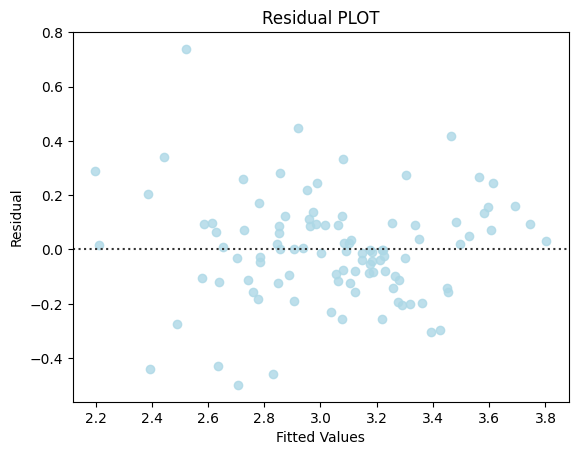

In [ ]:
# Predicted values
fitted = ridge_model.predict(x_test3)

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residuals_test, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

*No clear pattern between fitted & residuals + they are scattered pretty randomly & uniformly --> linear assumption holds.*

### **4. No Heteroscedasticity**

* **Homoscedasticity:** If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedasticity:** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non-symmetrical shape.

* We will use `Goldfeld–Quandt` test to check homoscedasticity:

    * **Null hypothesis:** Residuals are homoscedastic

    * **Alternate hypothesis:** Residuals are hetroscedastic

    * **alpha = 0.05**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals_train, x_train3)
lzip(name, test)

[('F statistic', 1.0348482295678445), ('p-value', 0.40656509197387036)]

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals_test, x_test3)
lzip(name, test)

[('F statistic', 1.097855859716146), ('p-value', 0.38463300173819304)]

**Observation:**

- As we can observe from the above test, the p-values are both greater than 0.05. So, we *fail to reject* the null-hypothesis, i.e., residuals are *homoscedastic*.

## Final Model

* All the assumptions for the linear regression model are satisfied. With our model's adjusted R-squared value of around 0.75, we can capture **75% of the variation** in the data.

* The p-values for the independent variables are less than 0.05 in our final model (after removing the insignificant variables), indicating that they are statistically significant toward Housing Price ('MEDV') prediction.

* Now, let's check and interpret the coefficients of the model.

In [ ]:
# Create a column of ones
ones_column = np.ones((x_train3.shape[0], 1))

# Add the column of ones to the data matrix
X_with_constant = np.c_[ones_column, x_train3]

# Fit the model with the new data matrix
ridge_model.fit(X_with_constant, y_train)

# Extract the feature names from the DataFrame columns
feature_names = list(data.columns)

# Access the coefficients, which now include the constant term
coefficients = list(zip(np.exp(ridge_model.coef_), feature_names))
coefficients

[(1.0, 'CRIM'),
 (1.0, 'ZN'),
 (0.9893604936667418, 'INDUS'),
 (1.0015205482117686, 'CHAS'),
 (1.089196273576755, 'NOX'),
 (0.6047543764326687, 'RM'),
 (1.0753793609348532, 'AGE'),
 (0.9555284457271825, 'DIS'),
 (1.012264577596945, 'RAD'),
 (0.9994213782936571, 'TAX'),
 (0.9655174153097975, 'PTRATIO'),
 (0.970104013828257, 'LSTAT')]

In [ ]:
constant_term = ridge_model.intercept_
constant_term

4.201015024385644

In [ ]:
feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [ ]:
constant = ridge_model.intercept_

# Print the equation with the constant term
print(Equation, constant, '+')

# Print the equation with coefficients and feature names
for i in range(len(coefficients_list)):
    print('(', coefficients_list[i], ') * ', feature_names[i], '+', end = ' ')

Median Home Value = 4.201015024385644 +
( 1.0 ) *  CRIM + ( 1.0 ) *  ZN + ( 0.9893604936667418 ) *  INDUS + ( 1.0015205482117686 ) *  CHAS + ( 1.089196273576755 ) *  NOX + ( 0.6047543764326687 ) *  RM + ( 1.0753793609348532 ) *  AGE + ( 0.9555284457271825 ) *  DIS + ( 1.012264577596945 ) *  RAD + ( 0.9994213782936571 ) *  TAX + ( 0.9655174153097975 ) *  PTRATIO + ( 0.970104013828257 ) *  LSTAT + 

### **Interpreting the Regression Coefficients**


* Since the Ridge regression shrinks coefficients towards zero & these are almost all staying near 1.0 (except *'RM'*, which is @ 0.6), this suggests they still have a balance influence on the dependent variable of 'MEDV'.

* This means that 1 unit change in any one variable is estimated to result in 1 unit change in 'MEDV'.  *However*, it is crucial to keep in mind the scale of different variables.
  * Ex: 1 unit of 'CRIM' = per capita crime rate, but 1 unit of 'RM' = a room in a house.
    * And for 'RM', in particular since that's the only coefficient not close to 1, its value suggests that for every extra room a house has, the median value increases by 0.6 thousand dollars (or $600).  This sounds quite low today, but that could make sense over 50 years ago.

* Also, it is important to remember that 'INDUS' & 'AGE' had high p-values.  So even though their estimated effects on 'MEDV' were both about 1 unit each (both are proportions)... that effect might not be statistically significant.
  * Another caveat, however, is that the chosen Ridge Regression also introduces a penalty on coefficients, so p-value is not a primary focus, but it could still be worth keeping in mind.

* And the constant term being about 4.2 would normally suggest that the target variable would still have a positive result even if all other features were set to zero.  This especially does not make sense with 'RM' since a house with no rooms is not really a house... it doesn't even exist.  So that intercept is to be taken with a grain of salt since it's more for the mathematical computation than a concrete real-world connection.

## Actionable Insights and Recommendations

* I realized too late that I did not treat 'CHAS' and 'RAD' properly as categorical values since they were given as numerical values.

* I wonder if regression methods would be significantly affected if they were treated as such.  My hunch is that performance metrics might slightly change, but a more significant effect would be on the coefficients since I was surprised that they are almost all still near 1.0 after a Ridge regression.

* However, it should not be much surprise that housing prices are affected by many factors.

* In addition, nonlinear regression might be worth trying since there was some multicollinearity (with 'RAD' & 'TAX').  But as mentioned, 'RAD' was a categorical value (just listed numerically with 9 unique values).
  * In fact, 'TAX' might also be somewhat categorical since there were only 66 unique values for over 500 records.  That averages to roughly 8 homes per tax rate.  Which means that it might be worth treating as such in further analysis, as well.
  * This actually might be true for multiple variables if they have fewer than 100 unique values.  It's just too difficult for me to decipher since it is not clear at all how the data was gathered & there's no explanation of it in this problem statement.  And when I looked up the original census data, it is not consistent how areas were delineated (some variables were measured by county, some by town, other by tract).  So it's honestly just too complex and inconsisten to really make any solid insights or recommendations

* Furthermore, if one purpose of this task was to "help potential buyers decide the characteristics of a house they want according to their budget" (*taken straight from the problem statement*), how are they ever going to obtain information like the Nitric Oxide concentration or "index of accessibility to radial highways"?

* But there are still definitely useful variables such as distance to employment centers and student-teacher ratios.  It could really be helpful to everyone (people using the models for decision-making AND actually training the models) to have more clarity on how the data was collected and what it means.

___